In [1]:
import os
import random
import matplotlib.pyplot as plt
import pylab
import numpy as np
import pickle

In [2]:
combinedDir = 'pyOsiriXimageExports/combined'
comptonDir = 'pyOsiriXimageExports/compton'
peDir = 'pyOsiriXimageExports/pe'
maskDir = 'pyOsiriXimageExports/mask'

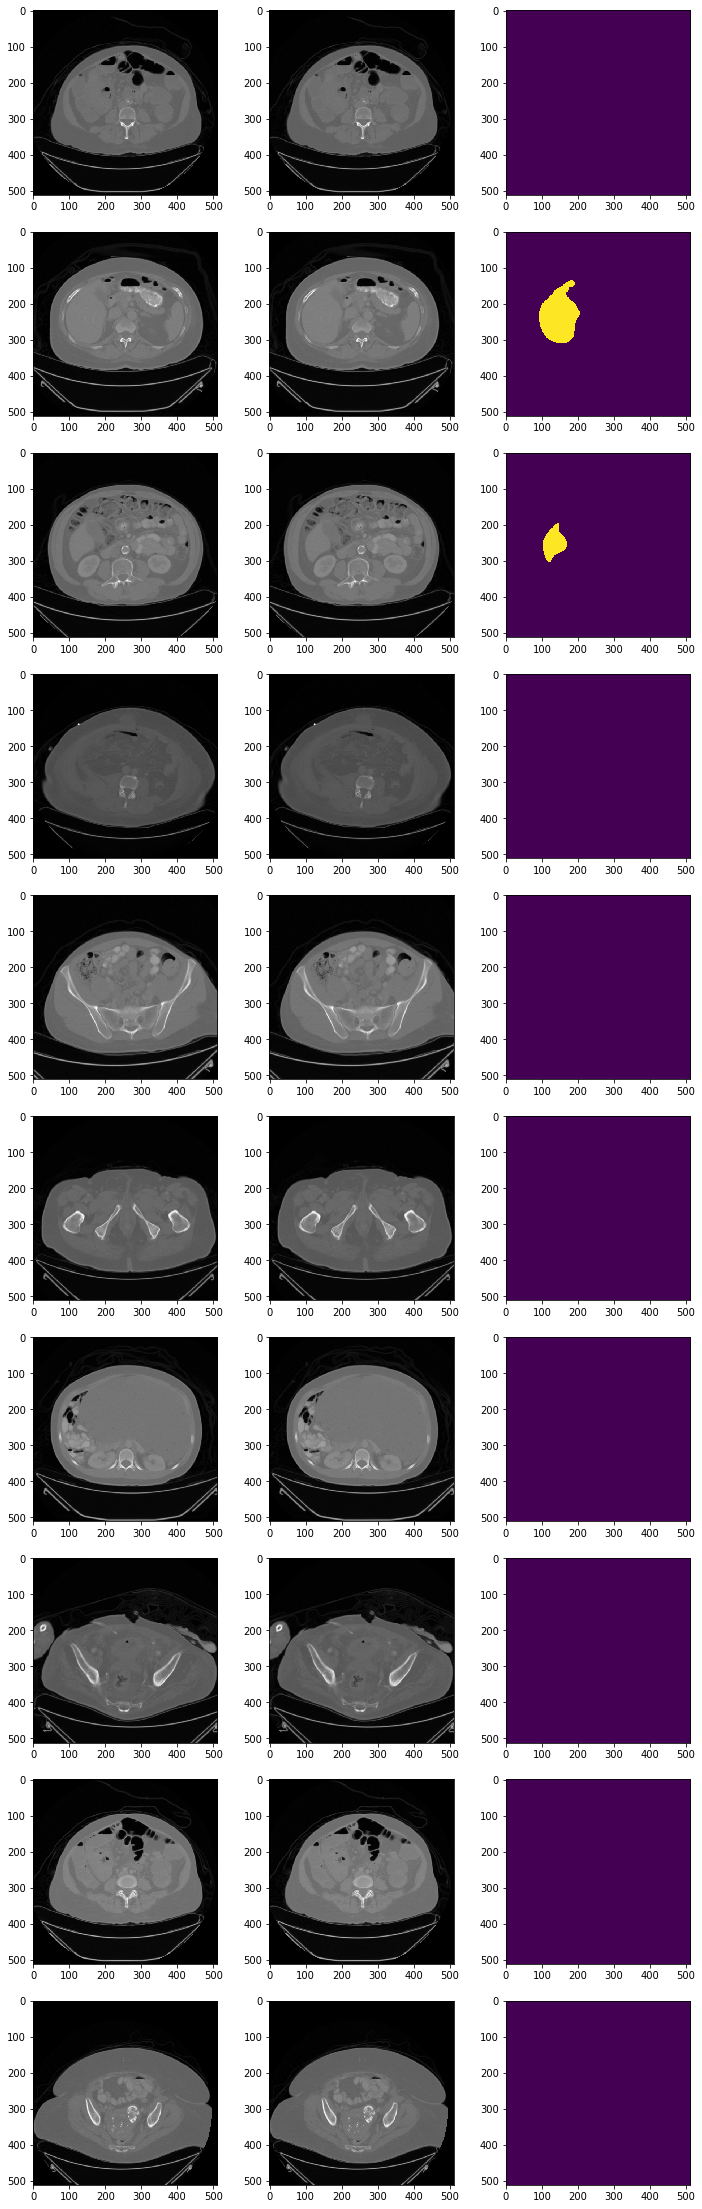

In [3]:
# Test some of the loaded data

fig, ax = plt.subplots(10, 3, figsize=(12,40))

for i in range(10):    
    filename = random.choice(os.listdir(combinedDir))
    #print filename

    combinedPath = combinedDir + '/' + filename
    combined = np.load(combinedPath)
    ax[i,0].imshow(combined.T, cmap='gray')
    ax[i,1].imshow(combined.T, cmap='gray')

    maskPath = maskDir + '/' + filename
    mask = np.load(maskPath)
    ax[i,2].imshow(mask.T)
    
plt.show()

load crossvalidation lists

In [4]:
cvDict = pickle.load(open("cvDict.p","rb"))

In [5]:
trainList = []
trainList.extend(cvDict['cv1'])
trainList.extend(cvDict['cv2'])
trainList.extend(cvDict['cv3'])
trainList.extend(cvDict['cv4'])
testList = cvDict['cv5']
print(trainList)
print(testList)

['249', '120', '938', '151', '873', '237', '754', '954', '625', '611', '414', '216', '942', '904', '687', '361', '261', '814', '434', '751', '709', '001', '445', '737']
['483', '540', '729', '681', '428', '935']


# Preparing training dataset

In [6]:
train_images = [x[:-4] for x in sorted(os.listdir(comptonDir)) if x[-4:]=='.npy' and x[:3] in trainList]
test_images = [x[:-4] for x in sorted(os.listdir(comptonDir)) if x[-4:]=='.npy' and x[:3] in testList]

In [7]:
print(len(train_images))
print(len(test_images))

2283
561


In [8]:
random.shuffle(train_images)
random.shuffle(test_images)

In [9]:
print(train_images[:5])

['7090074', '9540056', '7370048', '9420022', '1200070']


In [10]:
sampleImagePath = combinedDir + '/' + train_images[0] + '.npy'
sampleImage = np.load(sampleImagePath)
imageWidth, imageHeight = sampleImage.shape
SEED = 42

x_data = []
y_data = []
#y_data = np.empty((len(train_images), imageHeight, imageWidth, 1), dtype='float32')

for i, name in enumerate(train_images):
    maskPath = maskDir + '/' + name + '.npy'
    mask = np.load(maskPath)
    if np.sum(mask)>0:
        mask = mask[:,:,np.newaxis]
        y_data.append(mask)
        combinedPath = combinedDir + '/' + name + '.npy'
        combined = np.load(combinedPath)
        #combined = combined #this line for adding normalization
        image = np.stack((combined,combined))
        #print image.shape
        image = np.moveaxis(image, 0, -1)
        x_data.append(image)
        
x_data = np.array(x_data)
y_data = np.array(y_data)

In [11]:
print(x_data.shape)
print(y_data.shape)

(852, 512, 512, 2)
(852, 512, 512, 1)


In [12]:
testImage = x_data[5, :, :, 1]
testMask = y_data[5, :, :, 0]

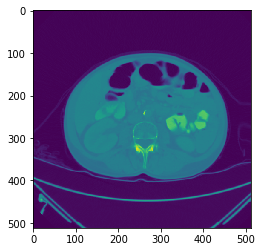

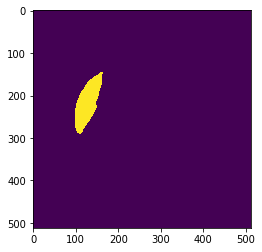

In [13]:
plt.imshow(testImage.T)
plt.figure()
plt.imshow(testMask.T)

Shape of xTrain:(852, 512, 512, 2)


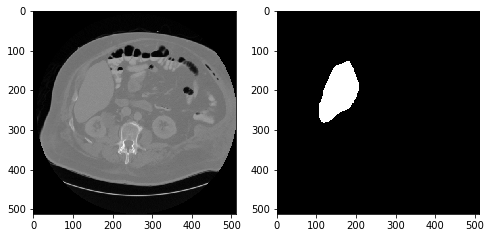

In [14]:
# test some of the filtered data
print ('Shape of xTrain:' + str(x_data.shape))
fig, ax = plt.subplots(1,2, figsize = (8,4))
ax[0].imshow(x_data[97,:,:,0].T, cmap='gray')
ax[1].imshow(y_data[97,:,:,0].T, cmap='gray')
plt.show()

Save the large dataset as npy file

In [15]:
saveImagePath = 'excldCV5-data/HU_xTrain_All_images.npy'
saveMaskPath = 'excldCV5-data/HU_yTrain_All_images.npy'
np.save(saveImagePath, x_data)
np.save(saveMaskPath, y_data)

# Preparing validation dataset

In [16]:
sampleImagePath = comptonDir + '/' + test_images[0] + '.npy'
sampleImage = np.load(sampleImagePath)
imageWidth, imageHeight = sampleImage.shape
SEED = 42

x_val = []
y_val = []
#y_data = np.empty((len(train_images), imageHeight, imageWidth, 1), dtype='float32')

for i, name in enumerate(test_images):
    maskPath = maskDir + '/' + name + '.npy'
    mask = np.load(maskPath)
    if np.sum(mask)>0:
        mask = mask[:,:,np.newaxis]
        y_val.append(mask)
        combinedPath = combinedDir + '/' + name + '.npy'
        combined = np.load(combinedPath)
        #compton = compton #this line for adding normalization
        image = np.stack((combined,combined))
        #print image.shape
        image = np.moveaxis(image, 0, -1)
        x_val.append(image)
        
x_val = np.array(x_val)
y_val = np.array(y_val)

In [17]:
save_val_imagePath = 'excldCV5-data/HU_xVal_All_images.npy'
save_val_maskPath = 'excldCV5-data/HU_yVal_All_images.npy'
np.save(save_val_imagePath, x_val)
np.save(save_val_maskPath, y_val)

In [18]:
print(x_val.shape)
print(y_val.shape)

(198, 512, 512, 2)
(198, 512, 512, 1)
